# Cartoonifying Images and Videos
### Complete # TODO

# Requirements

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import sys
import os

# Cartoonify Function

In [ ]:
def cartoonify(image_rgb): 
    if image_rgb is None: 
        print("Error: Input image to cartoonify is None.")
        return None

    grayScaleImage = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY) 

    smoothGrayScale = cv2.medianBlur(grayScaleImage, 7) 

    getEdge = cv2.adaptiveThreshold(smoothGrayScale, 255,
                                    cv2.ADAPTIVE_THRESH_MEAN_C,
                                    cv2.THRESH_BINARY, 9, 5)  

    colorImage = cv2.bilateralFilter(image_rgb, d=9, sigmaColor=250, sigmaSpace=250) 

    cartoonImage = cv2.bitwise_and(colorImage, colorImage, mask=getEdge) 

    return cartoonImage


This Python function, `cartoonify`, applies a cartoon effect to an input RGB image.
It first converts the image to grayscale and smooths it using a median blur.
Edges are then detected in the smoothed grayscale image using an adaptive threshold.
Separately, the original color image is smoothed using a bilateral filter to preserve edges while reducing noise.
Finally, it combines the color-smoothed image with the detected edges using a bitwise AND operation to create the cartoon look.

# Cartoonifying Images

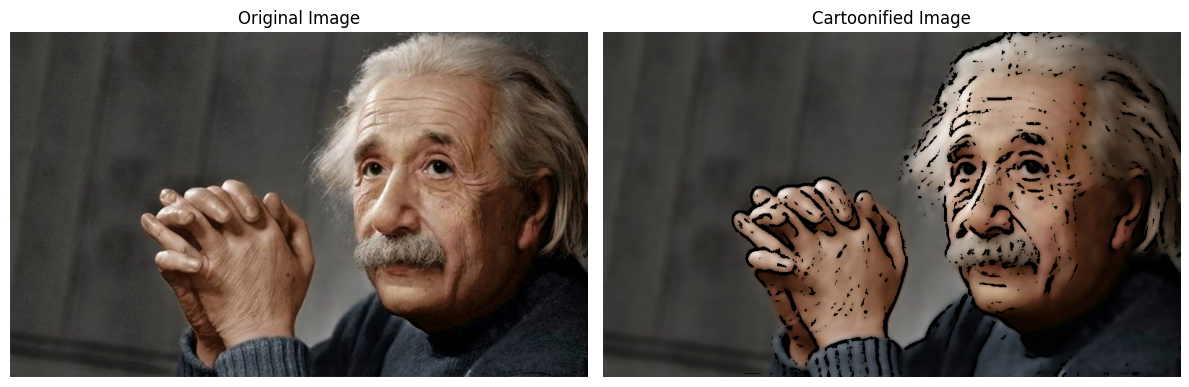

In [ ]:
import os 
import cv2 

image_path = os.path.join("images", "Einstein.jpeg")

original_bgr_image = cv2.imread(image_path)

if original_bgr_image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    image_rgb_input = cv2.cvtColor(original_bgr_image, cv2.COLOR_BGR2RGB)

    cartoon_result_rgb = cartoonify(image_rgb_input.copy())

    if cartoon_result_rgb is None:
        print("Error: Cartoonify function returned None for the single image.")
    else:
        plt.figure(figsize=(12, 6)) 

        plt.subplot(1, 2, 1)
        plt.title("Original Image")
        plt.imshow(image_rgb_input) 
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.title("Cartoonified Image")
        plt.imshow(cartoon_result_rgb)
        plt.axis("off")

        plt.tight_layout()
        plt.show() 




This Python script loads an image named "Einstein.jpeg" from an "images" directory.
It converts the loaded BGR image to RGB format, which is suitable for Matplotlib display and the `cartoonify` function.
The script then calls the `cartoonify` function with a copy of the RGB image to get the cartoon version.
Using Matplotlib, it prepares a figure with two subplots to show the original image side-by-side with its cartoonified version.
Finally, it displays this comparison plot, turning off axis numbers for a cleaner look.

# Cartoonify Webcam Video Stream

In [ ]:
def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255) 
    else:
        text_color = (0, 255, 0) 

    row_size = 20 
    left_margin = 24 

    font_size = 1
    font_thickness = 2

    fps_text = "FPS = {:.1f}".format(fps)
    text_location = (left_margin, row_size)
    
    cv2.putText(
        image,
        fps_text,
        text_location,
        cv2.FONT_HERSHEY_PLAIN,
        font_size,
        text_color,
        font_thickness,
    )

    return image


This Python function, `visualize_fps`, annotates an input `image` with its frames per second (`fps`).
It first determines the text color: white for grayscale images, green for color images.
The FPS value is formatted into a string like "FPS = XX.X".
It then defines the text's location, font size, and thickness for display.
Finally, `cv2.putText` draws this FPS information onto the image, which is then returned.

In [ ]:
CAMERA_DEVICE_ID_CAM = 0  
IMAGE_WIDTH_CAM = 800  
IMAGE_HEIGHT_CAM = 600
fps_cam = 0 

if __name__ == "__main__":  
    print("Starting live camera cartoonification...")
    cap_cam = None 
    try:
        cap_cam = cv2.VideoCapture(CAMERA_DEVICE_ID_CAM) # TODO

        if not cap_cam.isOpened():
            print(f"Error: Could not open camera {CAMERA_DEVICE_ID_CAM}.")
        else:
            while True:  
                start_time_cam = time.time() # TODO

                ret_cam, frame_bgr_cam = cap_cam.read() # TODO
                if not ret_cam or frame_bgr_cam is None:
                    print("Error: Failed to capture frame from camera or camera disconnected.")
                    break

                frame_bgr_resized_cam = cv2.resize(frame_bgr_cam, (IMAGE_WIDTH_CAM, IMAGE_HEIGHT_CAM)) # TODO

                frame_rgb_input_cam = cv2.cvtColor(frame_bgr_resized_cam, cv2.COLOR_BGR2RGB)

                cartoon_frame_rgb_cam = cartoonify(frame_rgb_input_cam) # TODO

                if cartoon_frame_rgb_cam is None:
                    print("Warning: Cartoonify returned None for a camera frame. Displaying original.")
                    frame_to_display_bgr_cam = frame_bgr_resized_cam
                else:
                    frame_to_display_bgr_cam = cv2.cvtColor(cartoon_frame_rgb_cam, cv2.COLOR_RGB2BGR)

                cv2.imshow("Cartoon Cam", visualize_fps(frame_to_display_bgr_cam, fps_cam)) # TODO Window name

                end_time_cam = time.time() # TODO
                seconds_cam = end_time_cam - start_time_cam # TODO
                if seconds_cam > 0:
                    fps_cam = 1.0 / seconds_cam # TODO
                else:
                    fps_cam = 0 # Avoid division by zero

                if cv2.waitKey(33) == 27: # TODO (Original was 33)
                    break
    except Exception as e:
        print(f"Exception in camera processing loop: {e}")
    finally:
        if cap_cam is not None and cap_cam.isOpened():
            cap_cam.release()
        cv2.destroyAllWindows()
    print("Exited live camera cartoonification.")




Starting live camera cartoonification...


2025-06-02 01:27:55.459 python[80144:3981347] +[IMKClient subclass]: chose IMKClient_Legacy
2025-06-02 01:27:55.459 python[80144:3981347] +[IMKInputSession subclass]: chose IMKInputSession_Legacy


Exited live camera cartoonification.


This Python script performs real-time cartoonification of a live camera feed.
It initializes the camera, sets desired frame width and height, and prepares for FPS calculation.
In a loop, it captures frames, resizes them, and converts from BGR to RGB for the `cartoonify` function.
The `cartoonify` function processes the frame, which is then converted back to BGR and displayed with an FPS counter.
Pressing 'ESC' exits the loop, releasing the camera and closing OpenCV windows.

# Cartoonifying Videos

In [ ]:
VIDEO_FILE_PATH = os.path.join("videos", "Jobs_2.mp4") 
IMAGE_WIDTH_VID = 1000 
IMAGE_HEIGHT_VID = 600  
fps_vid = 0  
FRAME_RATE_VID = 30  
DURATION_VID = 1 / FRAME_RATE_VID  

if __name__ == "__main__":  
    print(f"Starting video file cartoonification for: {VIDEO_FILE_PATH}")
    cap_vid = None 
    try:
        if not os.path.exists(VIDEO_FILE_PATH):
            print(f"Error: Video file not found at {VIDEO_FILE_PATH}")
        else:
            cap_vid = cv2.VideoCapture(VIDEO_FILE_PATH)

            if not cap_vid.isOpened():
                print(f"Error: Could not open video file {VIDEO_FILE_PATH}.")
            else:
                while True: 
                    start_time_vid = time.time()

                    ret_vid, frame_bgr_vid = cap_vid.read()
                    if not ret_vid or frame_bgr_vid is None:
                        print("Video ended or failed to capture frame.")
                        break
                    
                    frame_bgr_resized_vid = cv2.resize(frame_bgr_vid, (IMAGE_WIDTH_VID, IMAGE_HEIGHT_VID))

                    frame_rgb_input_vid = cv2.cvtColor(frame_bgr_resized_vid, cv2.COLOR_BGR2RGB)

                    cartoon_frame_rgb_vid = cartoonify(frame_rgb_input_vid)
                    
                    frame_to_display_bgr_vid = None
                    if cartoon_frame_rgb_vid is None:
                        print("Warning: Cartoonify returned None for a video frame. Displaying original.")
                        frame_to_display_bgr_vid = frame_bgr_resized_vid
                    else:
                        frame_to_display_bgr_vid = cv2.cvtColor(cartoon_frame_rgb_vid, cv2.COLOR_RGB2BGR)


                    end_time_proc_vid = time.time()
                    seconds_proc_vid = end_time_proc_vid - start_time_vid

                    if seconds_proc_vid < DURATION_VID:
                        time.sleep(DURATION_VID - seconds_proc_vid)

                    final_total_seconds_vid = time.time() - start_time_vid
                    if final_total_seconds_vid > 0:
                        fps_vid = 1.0 / final_total_seconds_vid
                    else:
                        fps_vid = 0


                    cv2.imshow("Cartoon Video", visualize_fps(frame_to_display_bgr_vid, fps_vid)) 

                    if cv2.waitKey(33) == 27:
                        break
    except Exception as e:
        print(f"Exception in video processing loop: {e}")
    finally:
        if cap_vid is not None and cap_vid.isOpened():
            cap_vid.release()
        cv2.destroyAllWindows()
    print("Exited video file cartoonification.")

print("Script finished.")


Starting video file cartoonification for: videos/Jobs_2.mp4
Video ended or failed to capture frame.
Exited video file cartoonification.
Script finished.


This Python script applies a cartoon effect to a specified video file.
It initializes by defining the video path, display dimensions, and a target frame rate for playback.
The script reads frames from the video, resizes them, and converts BGR to RGB for the `cartoonify` function.
After `cartoonify` processes the frame, it's converted back to BGR, and the script pauses if needed to match the target frame rate before displaying with an FPS counter.
Processing stops on 'ESC' key press or at video's end, then it releases resources.
